<a href="https://colab.research.google.com/github/adityajadhavvv/SMAVIVACODE/blob/main/Copy_of_SMA_Sentiment_Analysisfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ntscraper

In [2]:
import tweepy
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from ntscraper import Nitter

In [4]:
scraper = Nitter(log_level = 1,skip_instance_check = False)

Testing instances: 100%|██████████| 77/77 [01:43<00:00,  1.34s/it]


In [5]:
tweets = scraper.get_tweets("CNBC_Awaaz",mode = "user",number = 100)

INFO:root:No instance specified, using random instance https://nitter.privacydev.net
INFO:root:Current stats for CNBC_Awaaz: 21 tweets, 0 threads...
INFO:root:Current stats for CNBC_Awaaz: 41 tweets, 0 threads...
INFO:root:Current stats for CNBC_Awaaz: 60 tweets, 0 threads...
INFO:root:Current stats for CNBC_Awaaz: 79 tweets, 0 threads...
INFO:root:Current stats for CNBC_Awaaz: 99 tweets, 0 threads...
INFO:root:Current stats for CNBC_Awaaz: 100 tweets, 0 threads...


In [6]:
from pprint import pprint

In [7]:
pprint(tweets)

{'threads': [],
 'tweets': [{'date': 'Apr 29, 2024 · 11:14 AM UTC',
             'external-link': '',
             'gifs': [],
             'is-pinned': True,
             'is-retweet': False,
             'link': 'https://twitter.com/CNBC_Awaaz/status/1784903964850286748#m',
             'pictures': [],
             'quoted-post': {},
             'replying-to': [],
             'stats': {'comments': 2, 'likes': 10, 'quotes': 0, 'retweets': 1},
             'text': 'Register for an exclusive webinar on commodity '
                     'trading.   To register click here '
                     'https://hindi.cnbctv18.com/commodity-gurukul/…… or link '
                     'in bio.  #CommodityGurukul #LearnWithCNBCAWAAZ '
                     '@Manisha3005 #AjayKedia #DineshSomani #ManojKumarJain',
             'user': {'avatar': 'https://pbs.twimg.com/profile_images/1775820560926212096/m9jj5ruW_bigger.jpg',
                      'name': 'CNBC-AWAAZ',
                      'profile_id': 

In [8]:
tweets.keys()

dict_keys(['tweets', 'threads'])

In [9]:
tweets['tweets']

[{'link': 'https://twitter.com/CNBC_Awaaz/status/1784903964850286748#m',
  'text': 'Register for an exclusive webinar on commodity trading.   To register click here https://hindi.cnbctv18.com/commodity-gurukul/…… or link in bio.  #CommodityGurukul #LearnWithCNBCAWAAZ @Manisha3005 #AjayKedia #DineshSomani #ManojKumarJain',
  'user': {'name': 'CNBC-AWAAZ',
   'username': '@CNBC_Awaaz',
   'profile_id': '1775820560926212096',
   'avatar': 'https://pbs.twimg.com/profile_images/1775820560926212096/m9jj5ruW_bigger.jpg'},
  'date': 'Apr 29, 2024 · 11:14 AM UTC',
  'is-retweet': False,
  'is-pinned': True,
  'external-link': '',
  'replying-to': [],
  'quoted-post': {},
  'stats': {'comments': 2, 'retweets': 1, 'quotes': 0, 'likes': 10},
  'pictures': [],
  'videos': ['https://video.twimg.com/amplify_video/1784903624079953920/vid/avc1/1280x720/NA37WylVz72Bppp4.mp4?tag=14'],
  'gifs': []},
 {'link': 'https://twitter.com/CNBC_Awaaz/status/1785693678285025711#m',
  'text': '#TakkarOnAwaaz । आज की

In [10]:
data ={
    'link':[],
    'text':[],
    'user':[],
    'likes':[],
    'quotes':[],
    'retweets':[],
    'comments':[]
}

for tweet in tweets['tweets']:
  data['link'].append(tweet['link'])
  data['text'].append(tweet['text'])
  data['user'].append(tweet['user'])
  data['likes'].append(tweet['stats']['likes'])
  data['quotes'].append(tweet['stats']['quotes'])
  data['retweets'].append(tweet['stats']['retweets'])
  data['comments'].append(tweet['stats']['comments'])

import pandas as pd
df =pd.DataFrame(data)
df.head()

,link,text,user,likes,quotes,retweets,comments
0,https://twitter.com/CNBC_Awaaz/status/17849039...,Register for an exclusive webinar on commodity...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",10,0,1,2
1,https://twitter.com/CNBC_Awaaz/status/17856936...,#TakkarOnAwaaz । आज की अच्छी खबर। #CNBCAwa...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",7,0,1,1
2,https://twitter.com/CNBC_Awaaz/status/17856926...,#LIVE | #TakkarOnAwaaz ▶️गठबंधन में फिर छिड...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",17,0,3,0
3,https://twitter.com/CNBC_Awaaz/status/17856845...,#Comingup | #TakkarOnAwaaz ▶️गठबंधन में फिर ...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",4,0,1,1
4,https://twitter.com/CNBC_Awaaz/status/17856707...,Stocks To Watch : मुनाफे बढ़ते ही डिविडेंड का ...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",12,0,0,0


In [11]:
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT[\S]+','',text)
  text=re.sub(r'https?:\/\/\S+','',text)
  return text
df['text']= df['text'].apply(cleanTxt)
df

,link,text,user,likes,quotes,retweets,comments
0,https://twitter.com/CNBC_Awaaz/status/17849039...,Register for an exclusive webinar on commodity...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",10,0,1,2
1,https://twitter.com/CNBC_Awaaz/status/17856936...,TakkarOnAwaaz । आज की अच्छी खबर। CNBCAwaaz...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",7,0,1,1
2,https://twitter.com/CNBC_Awaaz/status/17856926...,LIVE | TakkarOnAwaaz ▶️गठबंधन में फिर छिड़ा...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",17,0,3,0
3,https://twitter.com/CNBC_Awaaz/status/17856845...,Comingup | TakkarOnAwaaz ▶️गठबंधन में फिर छि...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",4,0,1,1
4,https://twitter.com/CNBC_Awaaz/status/17856707...,Stocks To Watch : मुनाफे बढ़ते ही डिविडेंड का ...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",12,0,0,0
...,...,...,...,...,...,...,...
95,https://twitter.com/CNBC_Awaaz/status/17852274...,AwaazBreakingNews 🔴निफ्टी रिकॉर्ड ऊंचाई पर N...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",14,0,1,3
96,https://twitter.com/CNBC_Awaaz/status/17852272...,EditorsTake | अनुज सिंघल से जानिए निफ्टी और नि...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",5,0,1,3
97,https://twitter.com/CNBC_Awaaz/status/17852251...,CNBCTV18Exclusive 🔸सरेंडर वैल्यू नियमों में ...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",9,0,1,4
98,https://twitter.com/CNBC_Awaaz/status/17852243...,LIVE | KamaikaAdda ▶️तेज बाजार में अनुज सिंघल...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",5,0,0,3


In [12]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)
df

,link,text,user,likes,quotes,retweets,comments,Subjectivity,Polarity
0,https://twitter.com/CNBC_Awaaz/status/17849039...,Register for an exclusive webinar on commodity...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",10,0,1,2,0.000000,0.000000
1,https://twitter.com/CNBC_Awaaz/status/17856936...,TakkarOnAwaaz । आज की अच्छी खबर। CNBCAwaaz...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",7,0,1,1,0.000000,0.000000
2,https://twitter.com/CNBC_Awaaz/status/17856926...,LIVE | TakkarOnAwaaz ▶️गठबंधन में फिर छिड़ा...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",17,0,3,0,0.583333,0.273201
3,https://twitter.com/CNBC_Awaaz/status/17856845...,Comingup | TakkarOnAwaaz ▶️गठबंधन में फिर छि...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",4,0,1,1,0.666667,0.333333
4,https://twitter.com/CNBC_Awaaz/status/17856707...,Stocks To Watch : मुनाफे बढ़ते ही डिविडेंड का ...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",12,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
95,https://twitter.com/CNBC_Awaaz/status/17852274...,AwaazBreakingNews 🔴निफ्टी रिकॉर्ड ऊंचाई पर N...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",14,0,1,3,0.000000,0.000000
96,https://twitter.com/CNBC_Awaaz/status/17852272...,EditorsTake | अनुज सिंघल से जानिए निफ्टी और नि...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",5,0,1,3,0.000000,0.000000
97,https://twitter.com/CNBC_Awaaz/status/17852251...,CNBCTV18Exclusive 🔸सरेंडर वैल्यू नियमों में ...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",9,0,1,4,0.000000,0.000000
98,https://twitter.com/CNBC_Awaaz/status/17852243...,LIVE | KamaikaAdda ▶️तेज बाजार में अनुज सिंघल...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",5,0,0,3,0.500000,0.170455


<function matplotlib.pyplot.show(close=None, block=None)>

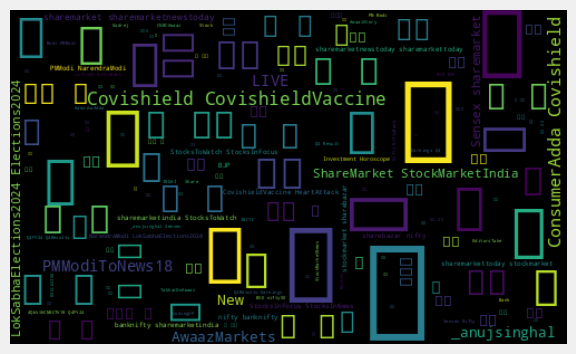

In [13]:
# Word Cloud Plotting ,
allWords =' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width =500, height=300, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation ="bilinear")
plt.axis('off')
plt.show

In [14]:
#Create function to compute negate , neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] =df['Polarity'].apply(getAnalysis)

#Show dataframe
df

,link,text,user,likes,quotes,retweets,comments,Subjectivity,Polarity,Analysis
0,https://twitter.com/CNBC_Awaaz/status/17849039...,Register for an exclusive webinar on commodity...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",10,0,1,2,0.000000,0.000000,Neutral
1,https://twitter.com/CNBC_Awaaz/status/17856936...,TakkarOnAwaaz । आज की अच्छी खबर। CNBCAwaaz...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",7,0,1,1,0.000000,0.000000,Neutral
2,https://twitter.com/CNBC_Awaaz/status/17856926...,LIVE | TakkarOnAwaaz ▶️गठबंधन में फिर छिड़ा...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",17,0,3,0,0.583333,0.273201,Positive
3,https://twitter.com/CNBC_Awaaz/status/17856845...,Comingup | TakkarOnAwaaz ▶️गठबंधन में फिर छि...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",4,0,1,1,0.666667,0.333333,Positive
4,https://twitter.com/CNBC_Awaaz/status/17856707...,Stocks To Watch : मुनाफे बढ़ते ही डिविडेंड का ...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",12,0,0,0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...
95,https://twitter.com/CNBC_Awaaz/status/17852274...,AwaazBreakingNews 🔴निफ्टी रिकॉर्ड ऊंचाई पर N...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",14,0,1,3,0.000000,0.000000,Neutral
96,https://twitter.com/CNBC_Awaaz/status/17852272...,EditorsTake | अनुज सिंघल से जानिए निफ्टी और नि...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",5,0,1,3,0.000000,0.000000,Neutral
97,https://twitter.com/CNBC_Awaaz/status/17852251...,CNBCTV18Exclusive 🔸सरेंडर वैल्यू नियमों में ...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",9,0,1,4,0.000000,0.000000,Neutral
98,https://twitter.com/CNBC_Awaaz/status/17852243...,LIVE | KamaikaAdda ▶️तेज बाजार में अनुज सिंघल...,"{'name': 'CNBC-AWAAZ', 'username': '@CNBC_Awaa...",5,0,0,3,0.500000,0.170455,Positive


In [15]:
#Print all positive tweets
j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+')' +sortedDF['text'][i])
    print()
    j=j+1

1)LIVE  | TakkarOnAwaaz   ▶️गठबंधन में फिर छिड़ा 'गृहयुद्ध'!अमेठी-रायबरेली की रेस  ‘परिवार’ का सस्पेंस!    ▶️किरेन रिजिजू SUPER EXCLUSIVE     CNBCAwaaz   

2)Comingup  | TakkarOnAwaaz  ▶️गठबंधन में फिर छिड़ा 'गृहयुद्ध'!अमेठी-रायबरेली की रेस  ‘परिवार’ का सस्पेंस!  ▶️किरेन रिजिजू SUPER EXCLUSIVE  टक्कर रात 9 बजे सिर्फ _Awaaz पर   CNBCAwaaz  

3)IRCTC Share: आईआरसीटीसी  का शेयर कब लगाएगा High? एक्सपर्ट्स ने दिया जवाब  IRCTC StockMarketNews 

4)Share News : Jindal Stainless ने बड़े प्लान का एलान किया, गुरुवार को शेयर पर रखें नजर  ShareMarket StockMarketIndia 

5)Car New Rules: 2029 तक इस देश की हर नई गाड़ी में होगा ये खास सिस्टम  

6)New Rules: Credit Card के नए नियम आज से लागू, आपके पास भी है तो फटाफट पढ़िए  

7)IRCTC कब लगाएगा High ?    Sensex sharemarket sharemarketnewstoday sharemarkettoday stockmarket sharebazar nifty banknifty sharemarketindia StocksToWatch StocksInFocus StocksInNews IRCTC

8)LIVE | बाजार में निवेशकों की क्या हो स्ट्रैटेजी?        ▶️बाजार में अब कहां है कमाई का मौका 

In [16]:
#Print all Negative tweets
j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')' +sortedDF['text'][i])
    print()
    j=j+1

In [17]:
#Print all neutral tweets
j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Neutral'):
    print(str(j)+')' +sortedDF['text'][i])
    print()
    j=j+1

1)Register for an exclusive webinar on commodity trading.   To register click here  or link in bio.  CommodityGurukul LearnWithCNBCAWAAZ  AjayKedia DineshSomani ManojKumarJain

2)TakkarOnAwaaz । आज की अच्छी खबर।     CNBCAwaaz |  MunafekiBaat

3)Stocks To Watch : मुनाफे बढ़ते ही डिविडेंड का एलान, कल इन 17 में दिखेगा फुल एक्शन  ShareMarket StockMarketIndia 

4)GoldyBrar की कैलिफोर्निया में गोली मारकर हत्या कर दी गई  हालांकि, आधिकारिक पुष्टि का इंतजार है, लंबे समय से यह माना जाता था कि गैंगस्टर गोल्डी बरार कनाडा में था

5)Godrej Split: 127 साल पुराने बिजनेस के बंटवारे में है उदय कोटक का अहम रोल, CNBC TV18 Exclusive  

6)Q4 Results: छुट्टी वाले दिन तीन सीमेंट कंपनियों ने जारी किए नतीजे  4QWithCNBCTV18 Q4FY24 Q4Results Earnings Q4 

7)SalmanKhan के घर हुई फायरिंग मामले में नया अपडेट आया है. पुलिस के गिरफ्तार किए आरोपियों में से एक अनुज थापन ने पुलिस कस्टडी में आत्महत्या करने की कोशिश की थी. इसके बाद उसे अस्पताल ले जाया गया था, जहां उसकी मौत हो गई है  SalmankhanHouseFiring

8)Q4 Results : अद

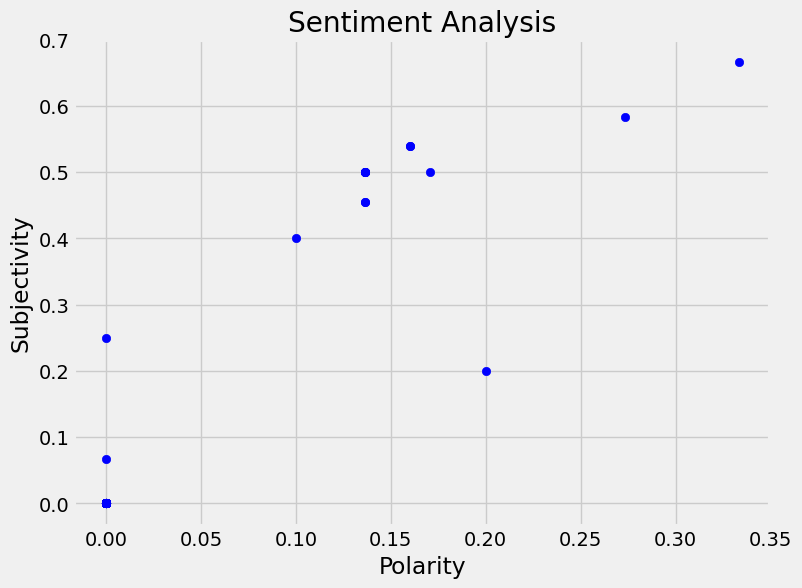

In [18]:
# Plot Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()